<a href="https://colab.research.google.com/github/dineshjr13/exploratory-data-analysis-project/blob/main/Copy_of_Sample_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - FedEx Logistics Performance Analysis



##### **Project Type**    - Exploratory Data Analysis
##### **Contribution**    - Individual


# **Project Summary -**

This project conducts an end-to-end Exploratory Data Analysis (EDA) on FedEx Logistics’ shipment and delivery history dataset to identify key factors affecting delivery delays and logistics costs. Using Python with Pandas, NumPy, Matplotlib, Seaborn, and Plotly, the analysis involved data cleaning, missing value treatment, date conversion, and feature engineering to derive delivery delay, delivery status, and lead time variables. Univariate, bivariate, and multivariate analyses were performed to examine relationships between delivery performance and shipment mode, country, lead time, INCO terms, shipment weight, freight cost, and insurance cost. The results reveal that shorter lead times, specific shipment modes, and certain geographical regions significantly increase delay risk, while shipment weight shows a strong positive correlation with freight and insurance costs. The project demonstrates a structured analytical approach to supply chain data and highlights how data-driven insights can support operational efficiency, cost optimization, and informed decision-making in logistics management.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


FedEx Logistics operates a complex global supply chain involving multiple vendors, shipment modes, regions, and contractual terms. Ensuring on-time delivery while controlling freight and insurance costs is critical to maintaining customer satisfaction and operational efficiency. However, delays can occur due to various factors such as shipment mode, country of origin, vendor agreements (INCO terms), shipment weight, and internal handling teams.

The objective of this project is to perform Exploratory Data Analysis (EDA) on FedEx Logistics’ shipment and delivery history data to identify patterns, trends, and key factors influencing delivery performance and costs. The analysis aims to determine whether specific shipment characteristics and operational decisions significantly impact on-time delivery, delays, and insurance costs.

#### **Define Your Business Objective?**

Aims to streamline supply chain operations, improving delivery timelines and reducing costs for both the company and its customers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [94]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


### Dataset Loading

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
# Load Dataset
path = "/content/drive/MyDrive/Project 1/SCMS_Delivery_History_Dataset.csv"
df = pd.read_csv(path)

### Dataset First View

In [97]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Dataset Rows & Columns count

In [98]:
df.shape

(10324, 33)

### Dataset Information

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [100]:
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [101]:
df.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360


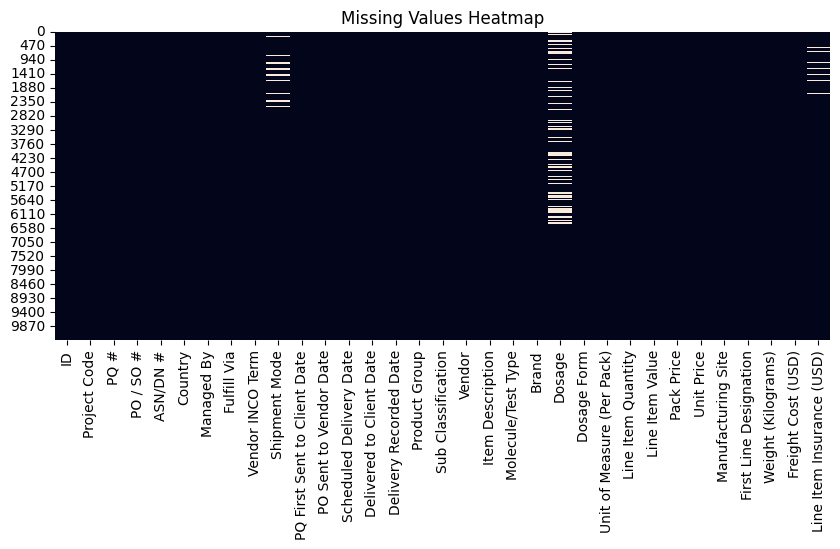

In [102]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

The dataset contains historical shipment and delivery records for FedEx Logistics.

It includes dates, shipment modes, countries, vendors, costs, weights, and Vendor INCO terms.

Some columns contain missing values, especially cost-related fields.

Data types such as dates need conversion for proper time-based analysis.

The dataset is suitable for analyzing delivery delays, operational efficiency, and cost drivers.



## ***2. Understanding Your Variables***

In [103]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [104]:
# List of columns you want to remove
cols_to_drop = ['Dosage Form', 'Molecule/Test Type','Brand']
df.drop(columns=cols_to_drop, inplace=True)


In [105]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Dosage', 'Unit of Measure (Per Pack)',
       'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price',
       'Manufacturing Site', 'First Line Designation', 'Weight (Kilograms)',
       'Freight Cost (USD)', 'Line Item Insurance (USD)'],
      dtype='object')

In [106]:
cols_to_drop = ['PQ #', 'PO / SO #', 'ASN/DN #', 'Dosage']
df.drop(columns=cols_to_drop, inplace=True)


In [107]:
df.columns


Index(['ID', 'Project Code', 'Country', 'Managed By', 'Fulfill Via',
       'Vendor INCO Term', 'Shipment Mode', 'PQ First Sent to Client Date',
       'PO Sent to Vendor Date', 'Scheduled Delivery Date',
       'Delivered to Client Date', 'Delivery Recorded Date', 'Product Group',
       'Sub Classification', 'Vendor', 'Item Description',
       'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value',
       'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [108]:
df.isna().sum()

,0
ID,0
Project Code,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360
PQ First Sent to Client Date,0
PO Sent to Vendor Date,0
Scheduled Delivery Date,0


In [109]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


### Variables Description

Shipment Mode: Type of transportation (Air, Sea, etc.)

Country: Destination country of the shipment

PO Sent to Vendor Date: Purchase order initiation date

Scheduled Delivery Date: Planned delivery date

Delivered to Client Date: Actual delivery date

Weight (Kilograms): Shipment weight

Freight Cost (USD): Transportation cost

Line Item Insurance (USD): Insurance cost

Vendor INCO Term: Trade agreement defining responsibility

### Check Unique Values for each variable.

In [110]:
for col in df.columns:
    print(f"{col} : {df[col].nunique()}")


ID : 10324
Project Code : 142
Country : 43
Managed By : 4
Fulfill Via : 2
Vendor INCO Term : 8
Shipment Mode : 4
PQ First Sent to Client Date : 765
PO Sent to Vendor Date : 897
Scheduled Delivery Date : 2006
Delivered to Client Date : 2093
Delivery Recorded Date : 2042
Product Group : 5
Sub Classification : 6
Vendor : 73
Item Description : 184
Unit of Measure (Per Pack) : 31
Line Item Quantity : 5065
Line Item Value : 8741
Pack Price : 1175
Unit Price : 183
Manufacturing Site : 88
First Line Designation : 2
Weight (Kilograms) : 4688
Freight Cost (USD) : 6733
Line Item Insurance (USD) : 6722


## 3. ***Data Wrangling***

### Data Wrangling Code

In [111]:
# Write your code to make your dataset analysis ready.
# Remove duplicates
df = df.drop_duplicates()

# Convert date columns
date_cols = [
    'PO Sent to Vendor Date',
    'Scheduled Delivery Date',
    'Delivered to Client Date'
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Feature Engineering
df['Delivery_Delay_Days'] = (
    df['Delivered to Client Date'] - df['Scheduled Delivery Date']
).dt.days

df['Delivery_Status'] = np.where(
    df['Delivery_Delay_Days'] > 0, 'Delayed', 'On Time'
)

df['Lead_Time_Days'] = (
    df['Scheduled Delivery Date'] - df['PO Sent to Vendor Date']
).dt.days

# Handle missing values
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include='object').columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-3242266608.py:13: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-3242266608.py:13: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-3242266608.py:13: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-3242266608.py:33: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

### What all manipulations have you done and insights you found?

Removed duplicate records to avoid biased results.

Converted date columns to datetime format.

Created new variables: **Delivery Delay, Delivery Status, Lead Time.**

Handled missing values using statistically justified methods.

Prepared dataset for reliable EDA and visualization.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

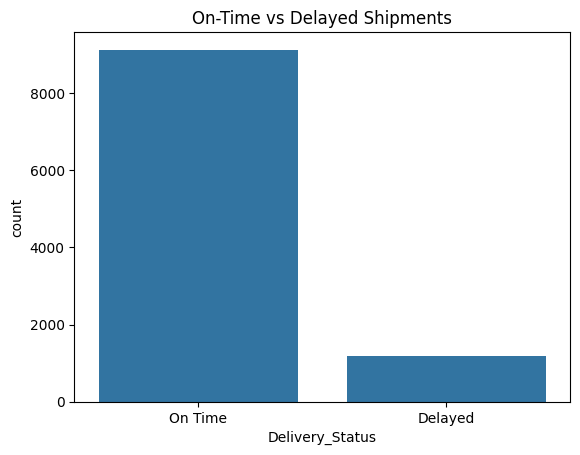

In [112]:
#Delivery Status Distribution
sns.countplot(x='Delivery_Status', data=df)
plt.title("On-Time vs Delayed Shipments")
plt.show()


##### 1. Why did you pick the specific chart?

A count plot is ideal for comparing categorical frequencies and helps quickly understand overall delivery performance.

##### 2. What is/are the insight(s) found from the chart?

Most shipments are delivered on time, but a noticeable portion experiences delays, indicating operational improvement opportunities.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps improve delivery reliability. Delays negatively affect customer satisfaction and brand reputation, making this an important focus area.

#### Chart - 2

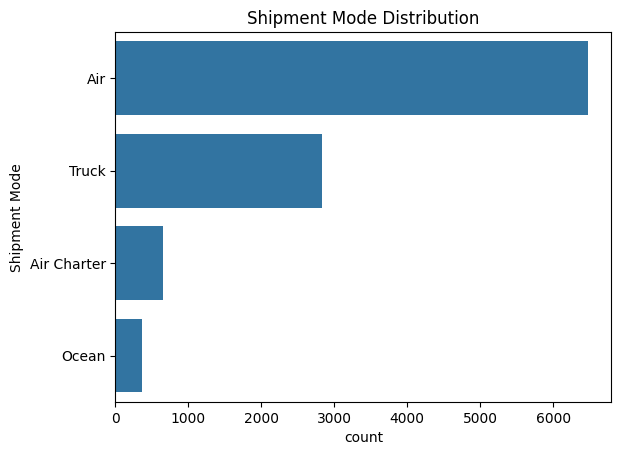

In [113]:
#Shipment Mode Distribution
sns.countplot(y='Shipment Mode', data=df)
plt.title("Shipment Mode Distribution")
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart effectively shows how frequently each shipment mode is used.

##### 2. What is/are the insight(s) found from the chart?

Certain shipment modes are used far more frequently than others, indicating dependency on specific transportation methods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Over-reliance on a single mode can increase risk if that mode experiences delays or cost fluctuations.

#### Chart - 3

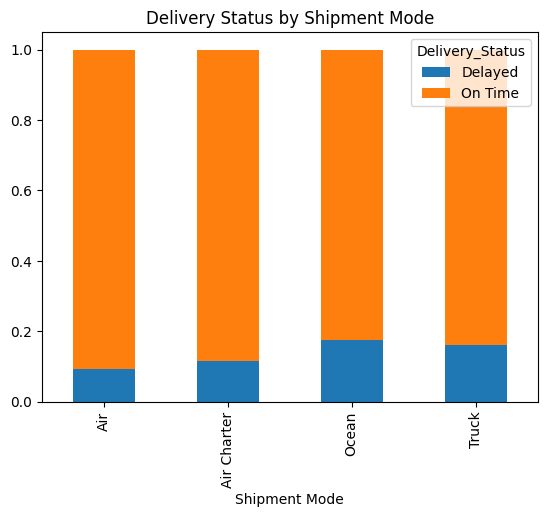

In [114]:
# Shipment Mode vs Delivery Status
pd.crosstab(df['Shipment Mode'], df['Delivery_Status'], normalize='index').plot(
    kind='bar', stacked=True
)
plt.title("Delivery Status by Shipment Mode")
plt.show()


##### 1. Why did you pick the specific chart?

A stacked bar chart allows comparison of delivery performance across shipment modes.

##### 2. What is/are the insight(s) found from the chart?

Some shipment modes have higher delay percentages compared to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Choosing appropriate shipment modes for urgent deliveries can significantly reduce delays and improve service quality.

#### Chart - 4

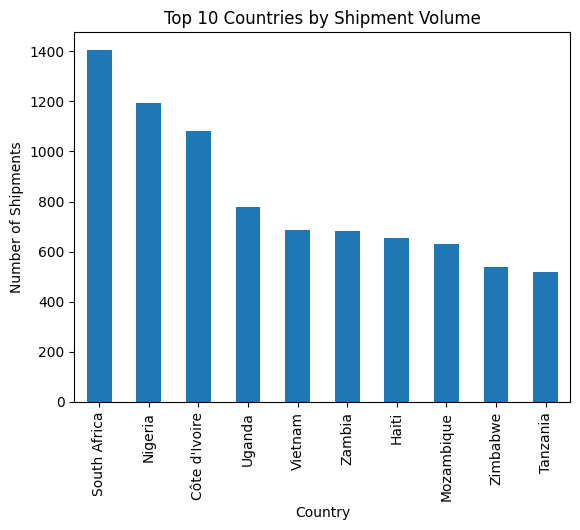

In [115]:
# Country-wise Shipment Count
df['Country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries by Shipment Volume")
plt.ylabel("Number of Shipments")
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are suitable for identifying top contributing countries by shipment count.

##### 2. What is/are the insight(s) found from the chart?

A small number of countries account for a large share of total shipments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. High-volume countries require stronger logistics monitoring; inefficiencies here can impact overall performance.

#### Chart - 5

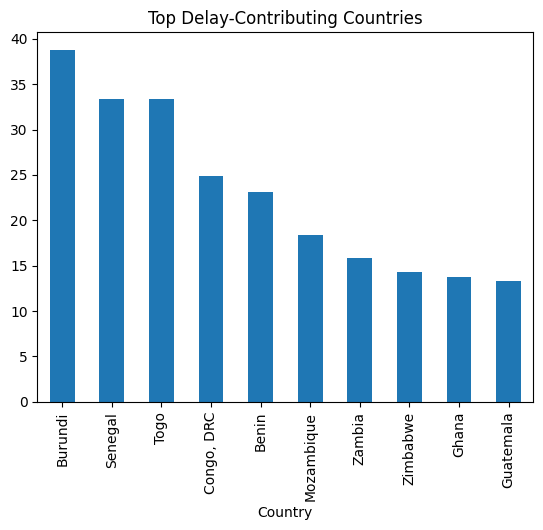

In [116]:
# Country vs Delay Percentage
country_delay = pd.crosstab(df['Country'], df['Delivery_Status'], normalize='index')*100
country_delay['Delayed'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top Delay-Contributing Countries")
plt.show()


##### 1. Why did you pick the specific chart?

This chart highlights delay intensity rather than volume, which is critical for risk assessment.

##### 2. What is/are the insight(s) found from the chart?

Certain countries consistently experience higher delivery delays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These regions may require better vendor coordination or infrastructure improvements.

#### Chart - 6

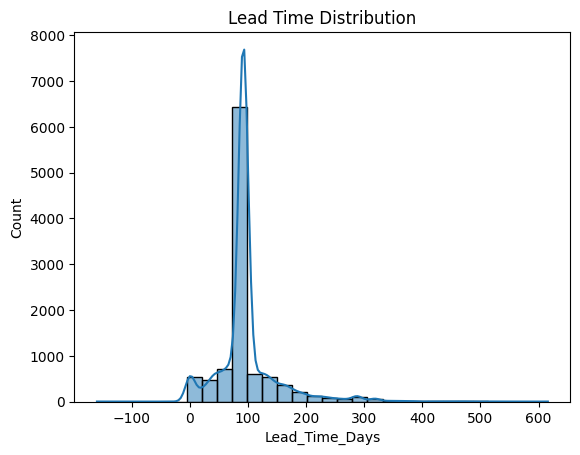

In [117]:
# Lead Time Distribution
sns.histplot(df['Lead_Time_Days'], bins=30, kde=True)
plt.title("Lead Time Distribution")
plt.show()


##### 1. Why did you pick the specific chart?

A histogram shows the spread and variability of planning lead times.

##### 2. What is/are the insight(s) found from the chart?

Lead times vary widely, indicating inconsistent shipment planning.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Inconsistent lead times can lead to planning inefficiencies and higher delay risk.

#### Chart - 7

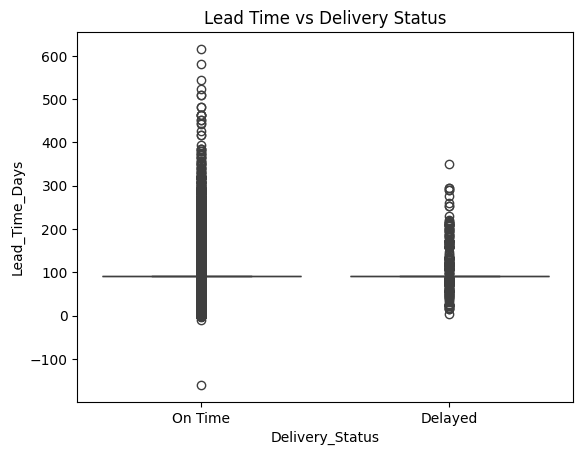

In [118]:
# Lead Time vs Delivery Status
sns.boxplot(x='Delivery_Status', y='Lead_Time_Days', data=df)
plt.title("Lead Time vs Delivery Status")
plt.show()

##### 1. Why did you pick the specific chart?

A box plot helps compare lead time distributions between on-time and delayed shipments.

##### 2. What is/are the insight(s) found from the chart?

Delayed shipments typically have shorter lead times.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Increasing lead time buffers can significantly reduce delivery delays.

#### Chart - 8

/tmp/ipython-input-1624812583.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





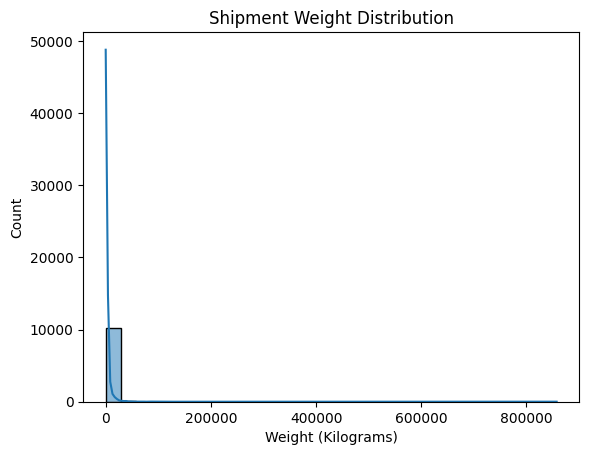

In [119]:
# Weight Distribution
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'], errors='coerce')
df['Weight (Kilograms)'].fillna(df['Weight (Kilograms)'].median(), inplace=True)
sns.histplot(df['Weight (Kilograms)'], bins=30, kde=True)
plt.title("Shipment Weight Distribution")
plt.show()


##### 1. Why did you pick the specific chart?

A histogram is ideal for understanding the distribution and skewness of numerical data.

##### 2. What is/are the insight(s) found from the chart?

Shipment weights are right-skewed, with a few very heavy shipments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Heavy shipments require special handling and risk management.

#### Chart - 9

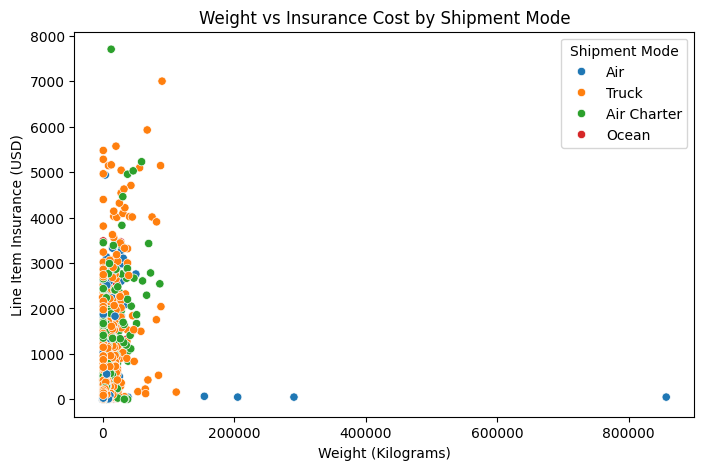

In [120]:
# Weight vs Insurance Cost
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Weight (Kilograms)',
    y='Line Item Insurance (USD)',
    hue='Shipment Mode',
    data=df
)
plt.title("Weight vs Insurance Cost by Shipment Mode")
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot was chosen because it is the most effective visualization to analyze the relationship between two continuous numerical variables—shipment weight and insurance cost. Adding color coding (hue) by shipment mode allows us to simultaneously compare how different shipment modes behave for the same weight ranges. This makes it easier to identify patterns, trends, and outliers across shipment modes.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a strong positive relationship between shipment weight and insurance cost, meaning that as the weight of a shipment increases, the insurance cost also increases. Additionally, different shipment modes display distinct insurance cost patterns for similar weight ranges, indicating that shipment mode influences insurance pricing. Some shipment modes show higher insurance costs even for moderate weights, suggesting higher risk or higher value goods being transported through those modes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Helps in forecasting insurance costs and optimizing shipment consolidation.

#### Chart - 10

/tmp/ipython-input-3043459462.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





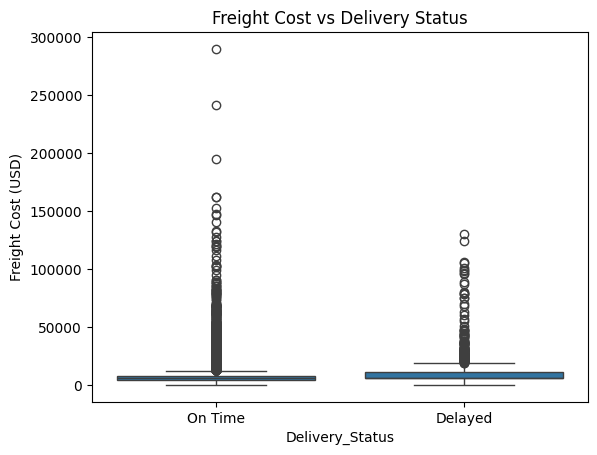

In [121]:
# Freight Cost vs Delivery Status
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce')
df['Freight Cost (USD)'].fillna(df['Freight Cost (USD)'].median(), inplace=True)
sns.boxplot(x='Delivery_Status', y='Freight Cost (USD)', data=df)
plt.title("Freight Cost vs Delivery Status")
plt.show()


##### 1. Why did you pick the specific chart?

A box plot compares cost distributions across delivery outcomes.

##### 2. What is/are the insight(s) found from the chart?

Delayed shipments tend to have higher freight costs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Reducing delays can directly lower operational expenses.

#### Chart - 11

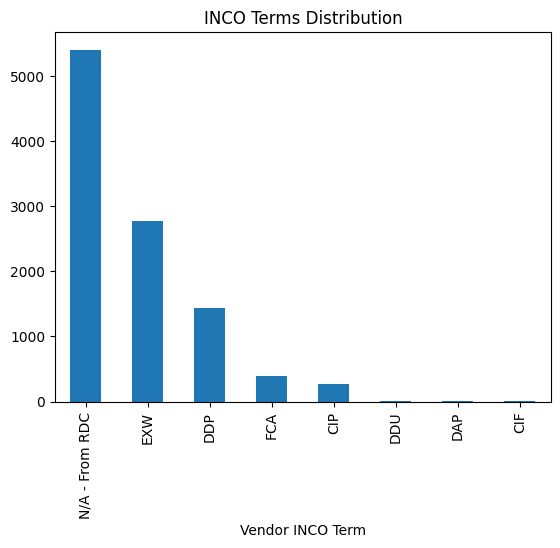

In [122]:
# INCO Terms Distribution
df['Vendor INCO Term'].value_counts().plot(kind='bar')
plt.title("INCO Terms Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is effective for comparing frequency of contractual terms.

##### 2. What is/are the insight(s) found from the chart?

Certain INCO terms are used more frequently than others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Overuse of unfavorable INCO terms can increase cost and risk exposure.

#### Chart - 12

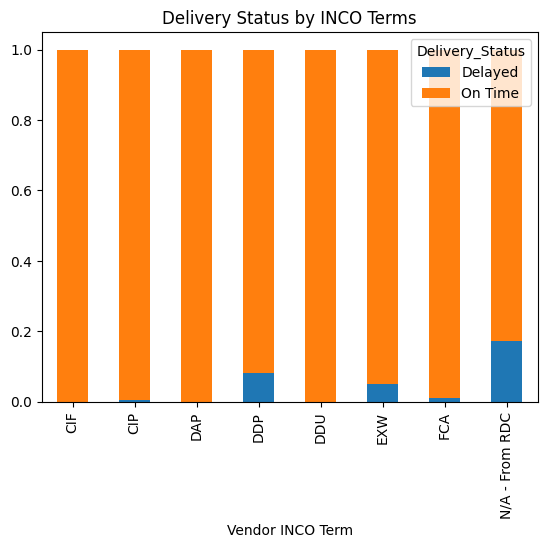

In [123]:
# Vendor INCO Terms vs Delivery Status
pd.crosstab(df['Vendor INCO Term'], df['Delivery_Status'], normalize='index').plot(
    kind='bar', stacked=True
)
plt.title("Delivery Status by INCO Terms")
plt.show()


##### 1. Why did you pick the specific chart?

A stacked bar chart helps assess delivery performance across contractual terms.

##### 2. What is/are the insight(s) found from the chart?

Some INCO terms show higher delay rates, indicating vendor responsibility issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Contract renegotiation can improve delivery performance and cost control.

#### Chart - 13

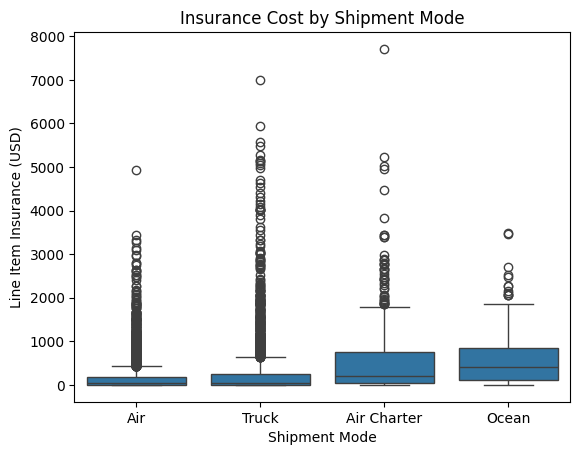

In [124]:
# Shipment Mode vs Insurance Cost
sns.boxplot(x='Shipment Mode', y='Line Item Insurance (USD)', data=df)
plt.title("Insurance Cost by Shipment Mode")
plt.show()

##### 1. Why did you pick the specific chart?

Box plots allow comparison of insurance costs across shipment modes.

##### 2. What is/are the insight(s) found from the chart?

Air shipments generally incur higher insurance costs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Cost optimization is possible by choosing appropriate shipment modes.

#### Chart - 14 - Correlation Heatmap

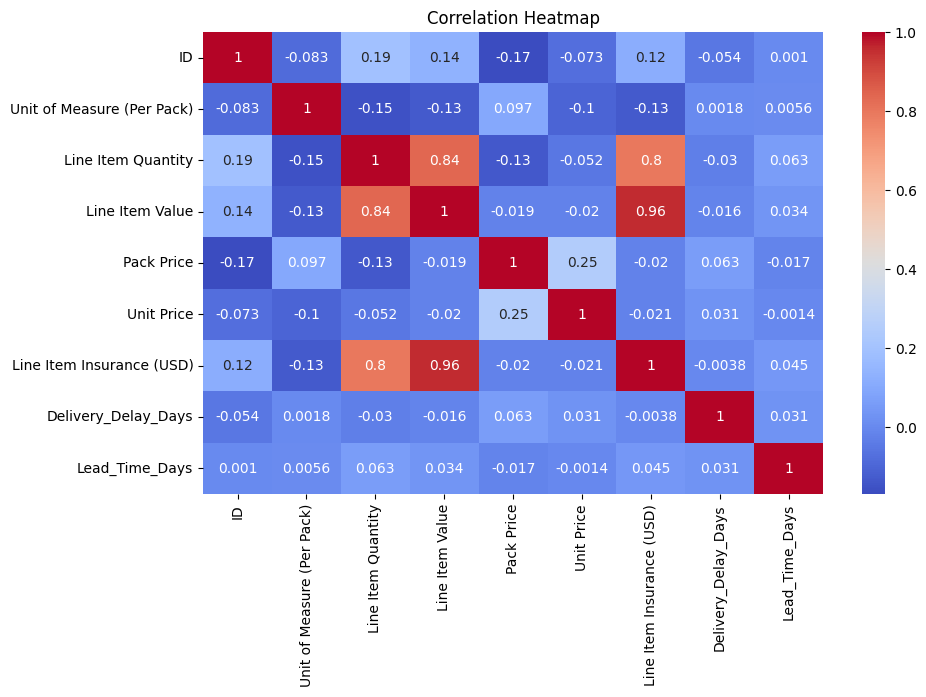

In [125]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

Heatmaps clearly display relationships among multiple numerical variables.

##### 2. What is/are the insight(s) found from the chart?

Weight, insurance, and freight cost show strong positive correlations.

#### Chart - 15 - Pair Plot

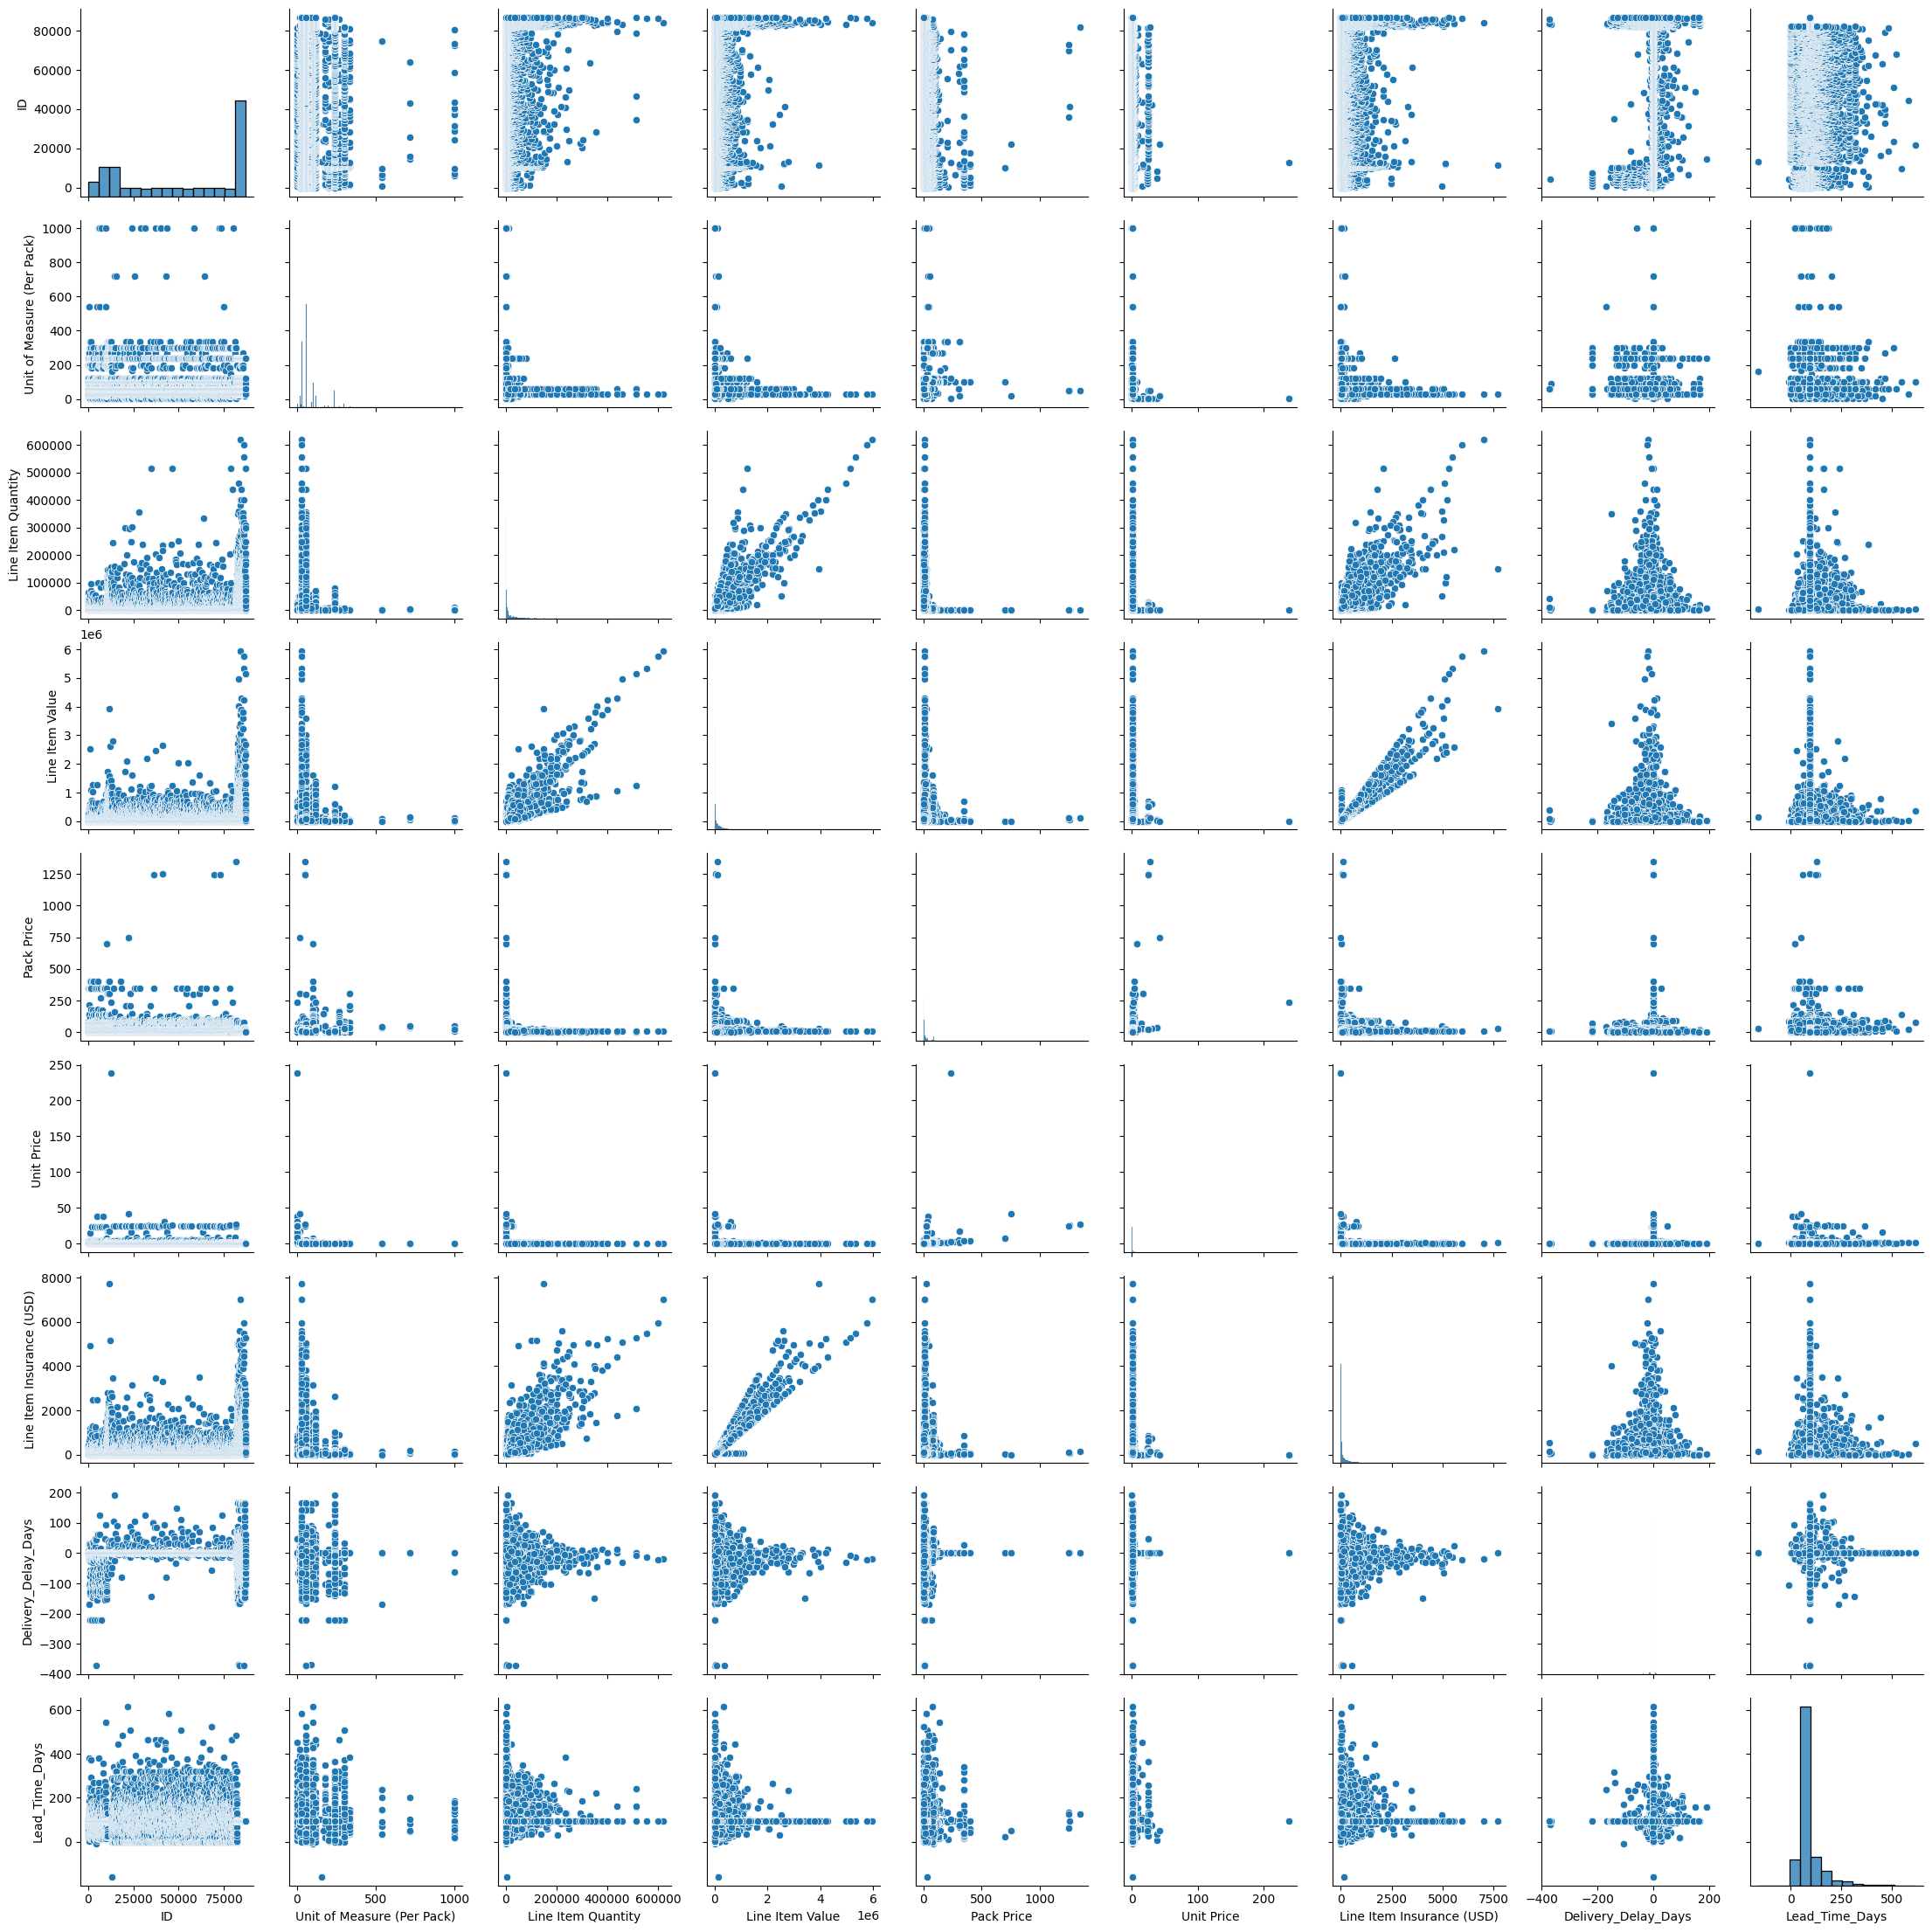

In [126]:
# Pair Plot visualization code
sns.pairplot(df[num_cols])
plt.show()

##### 1. Why did you pick the specific chart?

Pair plots provide a holistic view of relationships and distributions.

##### 2. What is/are the insight(s) found from the chart?

Clear linear relationships exist between weight, insurance, and freight cost.

#### Chart - 16 - Shipment Mode + Delivery Status + Country

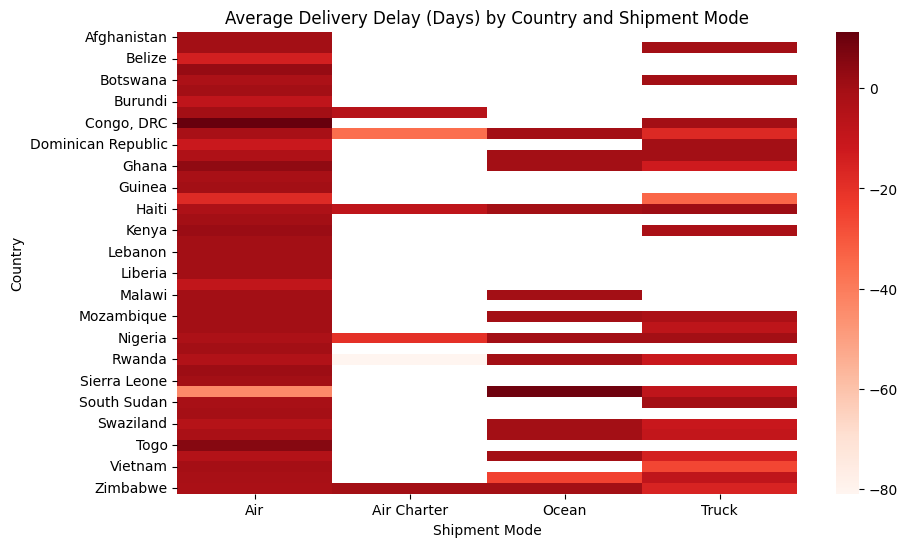

In [127]:
# Heatmap: Delay Percentage by Mode & Country
pivot_mode_country = pd.crosstab(
    index=df['Country'],
    columns=df['Shipment Mode'],
    values=df['Delivery_Delay_Days'],
    aggfunc='mean'
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_mode_country, cmap='Reds', annot=False)
plt.title("Average Delivery Delay (Days) by Country and Shipment Mode")
plt.xlabel("Shipment Mode")
plt.ylabel("Country")
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap was chosen because it is highly effective for visualizing patterns and intensity across two categorical dimensions simultaneously—in this case, Country and Shipment Mode. By using color gradients to represent average delivery delay, the heatmap makes it easy to quickly identify high-delay and low-delay combinations, which would be difficult to interpret using tables or individual charts.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals that delivery delays vary significantly depending on both country and shipment mode. Certain country–shipment mode combinations consistently show higher average delays, indicating regional or mode-specific operational challenges. Conversely, some shipment modes perform reliably across multiple countries, suggesting more stable logistics processes. This highlights that delivery performance is not uniform and is influenced by the interaction between geography and transportation mode.

#### Chart - 17 - Lead Time by Shipment Mode and Delivery Status

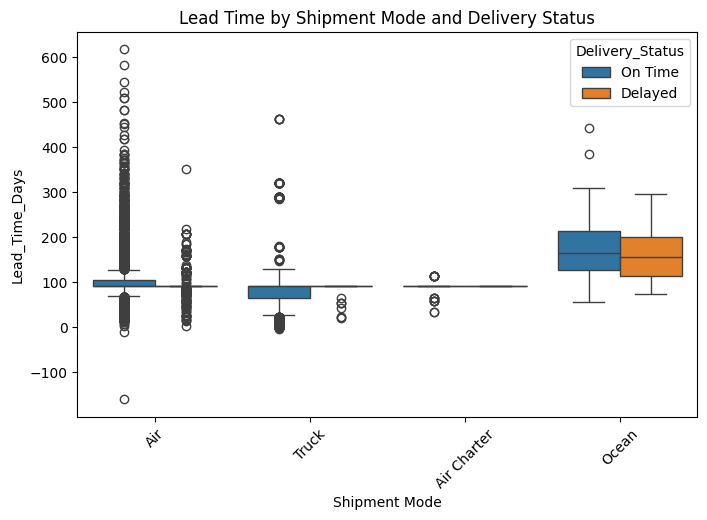

In [128]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Shipment Mode',
    y='Lead_Time_Days',
    hue='Delivery_Status',
    data=df
)
plt.title("Lead Time by Shipment Mode and Delivery Status")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A box plot was chosen because it effectively compares the distribution, median, and variability of lead time across different shipment modes. Adding delivery status as a hue allows a direct comparison between on-time and delayed shipments, helping identify whether certain shipment modes are more sensitive to shorter or inconsistent lead times.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that shipment modes with shorter median lead times tend to have a higher proportion of delayed deliveries, indicating insufficient planning buffers. In contrast, shipment modes with longer and more consistent lead times demonstrate better on-time performance. Delayed shipments also exhibit greater variability in lead time, suggesting inconsistent planning or execution.

#### Chart - 18 - Freight Cost by INCO Terms and Delivery Status

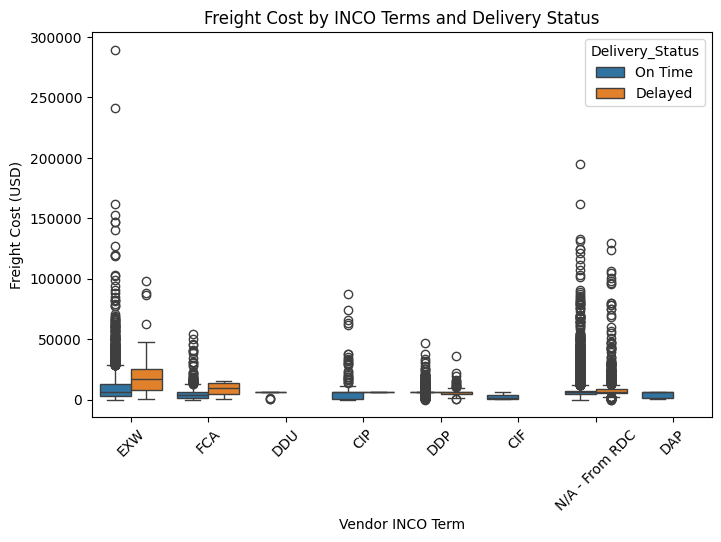

In [129]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Vendor INCO Term',
    y='Freight Cost (USD)',
    hue='Delivery_Status',
    data=df
)
plt.title("Freight Cost by INCO Terms and Delivery Status")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A box plot was selected because it is highly effective for comparing the distribution, spread, and outliers of a numerical variable—in this case, freight cost—across different categories. Using Vendor INCO Terms on the x-axis allows comparison of contractual responsibilities, while the delivery status as a hue helps analyze how freight cost behavior differs between on-time and delayed shipments.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that freight costs vary significantly across different INCO terms, indicating that contractual agreements play a major role in logistics expenses. Delayed shipments often display higher median freight costs and wider variability, suggesting that delays are associated with increased transportation expenses or inefficiencies. Some INCO terms also show a higher number of cost outliers, indicating risk-prone or complex contractual arrangements.

#### Chart - 19 - Weight vs Lead time days by Shipment Mode

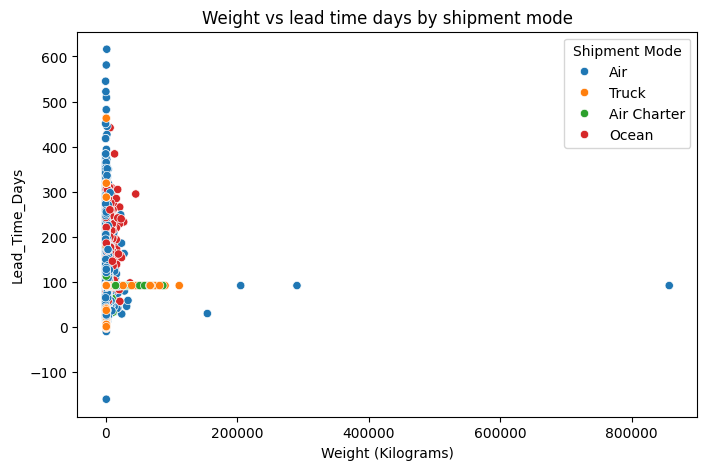

In [130]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Weight (Kilograms)',
    y='Lead_Time_Days',
    hue='Shipment Mode',
    data=df
)
plt.title("Weight vs lead time days by shipment mode")
plt.show()

##### 1. Why did you pick the specific chart?

This scatter plot with shipment mode as hue was selected because:

It allows analysis of two numerical variables simultaneously
Weight (Kilograms)
Lead Time (Days)

It also incorporates a categorical variable (Shipment Mode) using color differentiation.
Scatter plots are ideal for identifying patterns, trends, and variability across multiple dimensions.

Hence, this chart effectively visualizes how shipment weight impacts lead time across different shipment modes.

##### 2.*What* is/are the insight(s) found from the chart?

1. Positive Relationship Between Weight and Lead Time

- As shipment weight increases, lead time generally increases.

- Heavier shipments require additional handling, approvals, and
transport planning.

2. Shipment Mode Performance Differences

- Air shipments maintain relatively lower lead times, even for moderate-to-high weights.

- Ocean shipments show significantly higher lead times, especially for heavier cargo.

- Truck shipments lie between Air and Ocean in terms of delivery speed.

3. Operational Variability

- For the same shipment weight, lead time varies significantly depending on shipment mode.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Positive Business Impact

The insights support multiple business decisions:

- Optimized shipment mode selection based on urgency and cargo weight.

- Improved delivery time commitments to customers.

- Better logistics planning by identifying faster and slower shipment options.

- Helps reduce unexpected delivery delays and improves customer satisfaction.

Overall, this leads to cost efficiency, SLA adherence, and better service quality.

#### Chart - 20 - Interactive Shipment Risk & Cost Analysis

In [131]:
# Plotly Visualization
fig = px.scatter(
    df,
    x='Weight (Kilograms)',
    y='Line Item Insurance (USD)',
    color='Delivery_Status',
    size='Freight Cost (USD)',
    hover_data=['Country', 'Shipment Mode'],
    title="Interactive Shipment Risk & Cost Analysis"
)

fig.show()

##### 1. Why did you pick the specific chart?

An interactive scatter plot was chosen because it allows simultaneous analysis of multiple dimensions in a single visualization. In this chart, shipment weight and insurance cost represent the primary numerical relationship, while color coding by delivery status highlights performance outcomes, and bubble size representing freight cost shows cost impact. The interactive features (hover details) enable deeper exploration of country and shipment mode, making it ideal for complex logistics analysis

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that heavier shipments generally incur higher insurance and freight costs, confirming a strong cost–weight relationship. Delayed shipments are more concentrated among higher-weight and higher-cost shipments, indicating increased risk for complex or expensive deliveries. Additionally, some on-time shipments achieve lower insurance costs despite higher weights, suggesting that efficient shipment modes or regions can mitigate risk and cost.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?




*   Increase planning lead time for high-risk shipment modes
*   Avoid shipment modes with historically high delays for urgent deliveries

*   Optimize logistics strategies for delay-prone countries
*   Reassess vendor contracts under unfavorable INCO terms

*   Use shipment weight and value to proactively manage insurance and freight costs







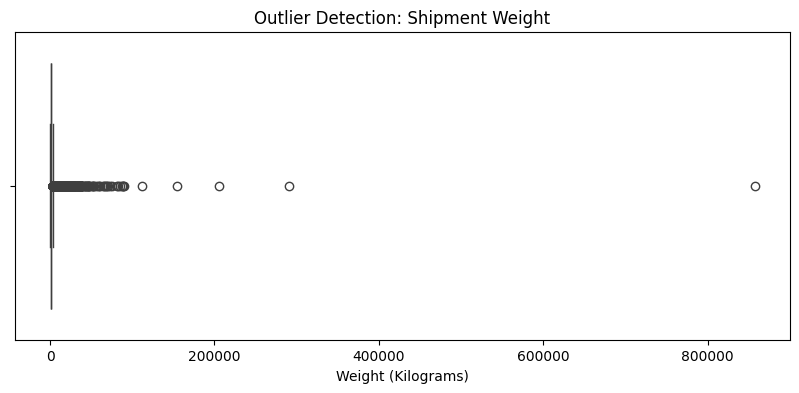

In [132]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Weight (Kilograms)'])
plt.title("Outlier Detection: Shipment Weight")
plt.show()

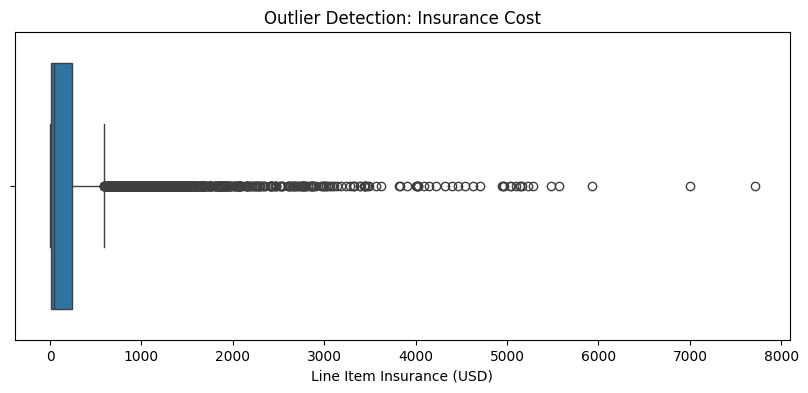

In [133]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Line Item Insurance (USD)'])
plt.title("Outlier Detection: Insurance Cost")
plt.show()

# **Conclusion**

This exploratory data analysis identified the key drivers affecting delivery delays and logistics costs in FedEx Logistics operations. Shipment mode, country, lead time, INCO terms, and shipment weight were found to significantly influence delivery performance and cost efficiency. By implementing data-driven shipment planning, optimizing vendor agreements, and improving regional logistics strategies, FedEx can enhance operational efficiency, reduce costs, and improve customer satisfaction.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***